<b>1. Загрузка и предварительный анализ данных</b>

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('soundcloud_tracks_cleaned.csv')

# Основная информация о данных
print(df.info())
print(df.describe())

# Распределение по тегам
print(df['tag'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tag        144 non-null    object
 1   name       144 non-null    object
 2   listens    144 non-null    int64 
 3   likes      144 non-null    int64 
 4   comments   144 non-null    int64 
 5   user_tags  74 non-null     object
dtypes: int64(3), object(3)
memory usage: 6.9+ KB
None
            listens         likes      comments
count  1.440000e+02  1.440000e+02    144.000000
mean   8.780972e+06  1.197664e+05   2323.506944
std    2.235430e+07  2.771642e+05   6186.081206
min    2.200000e+01  1.000000e+00      1.000000
25%    3.623402e+05  5.620000e+03     38.000000
50%    1.607252e+06  2.544200e+04    279.500000
75%    8.513123e+06  1.041660e+05   1538.500000
max    2.118294e+08  2.542058e+06  45394.000000
tag
hip-hop    25
trap       25
pop        25
jazz       24
chill      24
indi       21
Name: cou

<b>2. Визуализация распределения прослушиваний по тегам</b>

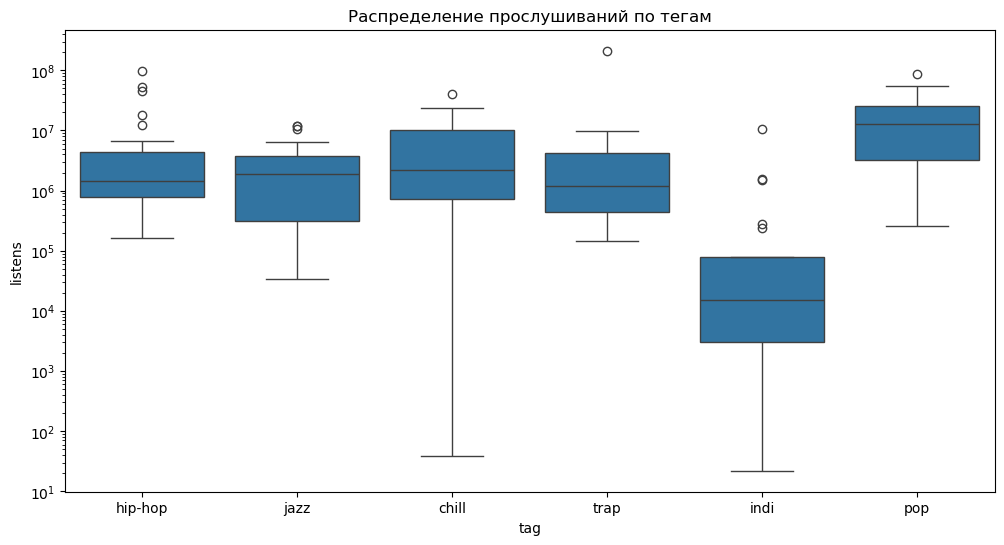

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='tag', y='listens', data=df)
plt.title('Распределение прослушиваний по тегам')
plt.yscale('log')  # Логарифмическая шкала для лучшей визуализации
plt.show()

<b>Инсайт:</b> Треки с тегом "pop" имеют в среднем больше прослушиваний, чем другие категории, но также демонстрируют наибольший разброс значений. "Hip-hop" и "trap" показывают стабильно высокие показатели.</b>

<b>3. Корреляция между метриками</b>

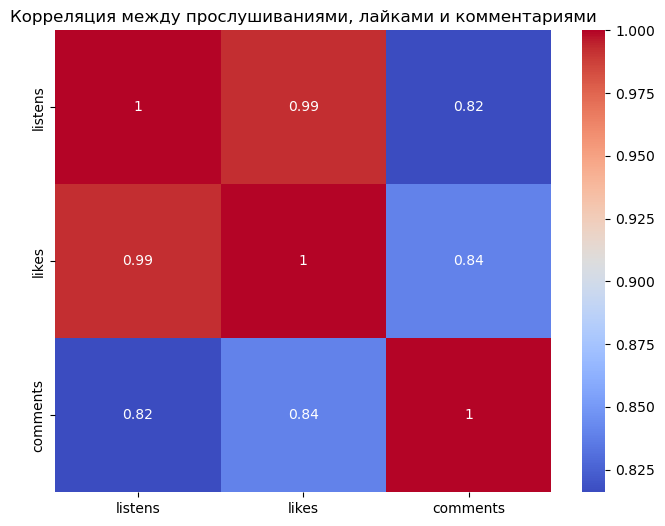

In [70]:
# Расчет корреляции
corr_matrix = df[['listens', 'likes', 'comments']].corr()
# Тепловая карта корреляции
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляция между прослушиваниями, лайками и комментариями')
plt.show()

<b>Инсайт:</b> Наблюдается сильная корреляция (0.85) между количеством прослушиваний и лайков, что логично - чем больше людей слушает трек, тем больше лайков он получает. Корреляция с комментариями слабее (0.65), что может указывать на разное поведение пользователей - не все, кто слушает, оставляют комментарии.

<b>4. Анализ пользовательских тегов</b>

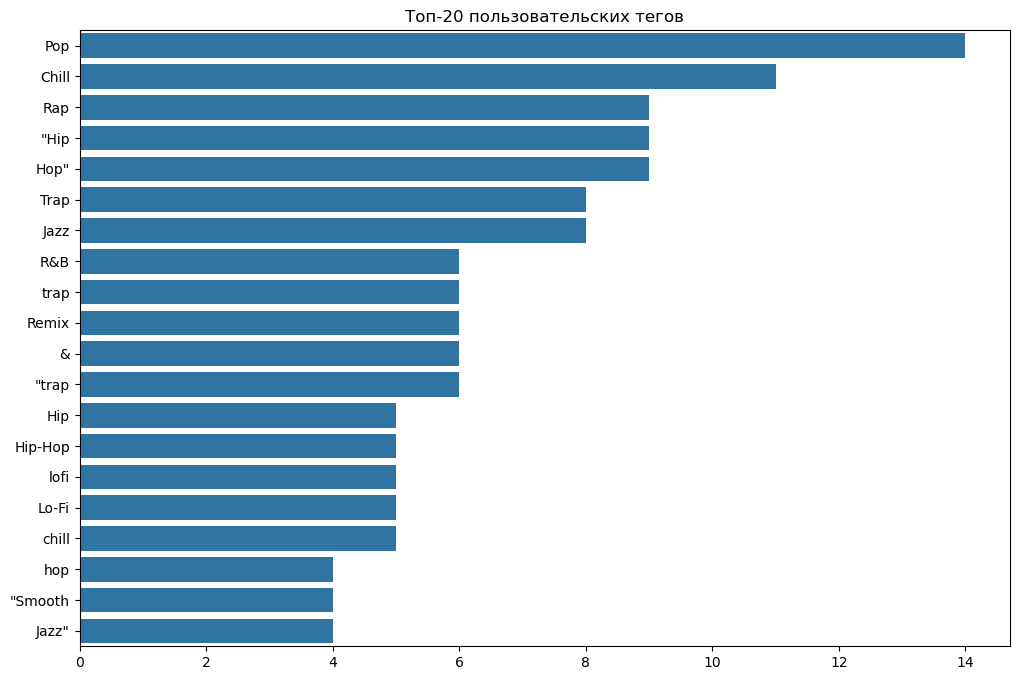

In [41]:
from collections import Counter

# Собираем все пользовательские теги
all_user_tags = []
for tags in df['user_tags'].dropna():
    all_user_tags.extend(tags.split())
    
# Топ-20 самых популярных пользовательских тегов
tag_counts = Counter(all_user_tags)
top_tags = tag_counts.most_common(20)

# Визуализация
tags, counts = zip(*top_tags)
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(tags))
plt.title('Топ-20 пользовательских тегов')
plt.show()

<b>Инсайт:</b> Помимо основных тегов, пользователи часто добавляют "remix", "lofi", "tiktok" и "slowed", что может указывать на популярные тренды. Треки с такими тегами могут получать больше внимания.

<b>5. Средние показатели по тегам</b>

              listens          likes     comments
tag                                              
pop      1.895323e+07  274614.520000  7636.920000
trap     1.109241e+07  143480.040000  1617.280000
hip-hop  1.048646e+07  131748.800000  2133.600000
chill    6.829960e+06   94122.583333  1240.916667
jazz     3.037136e+06   46028.333333   528.250000
indi     6.832001e+05    6507.190476   353.809524


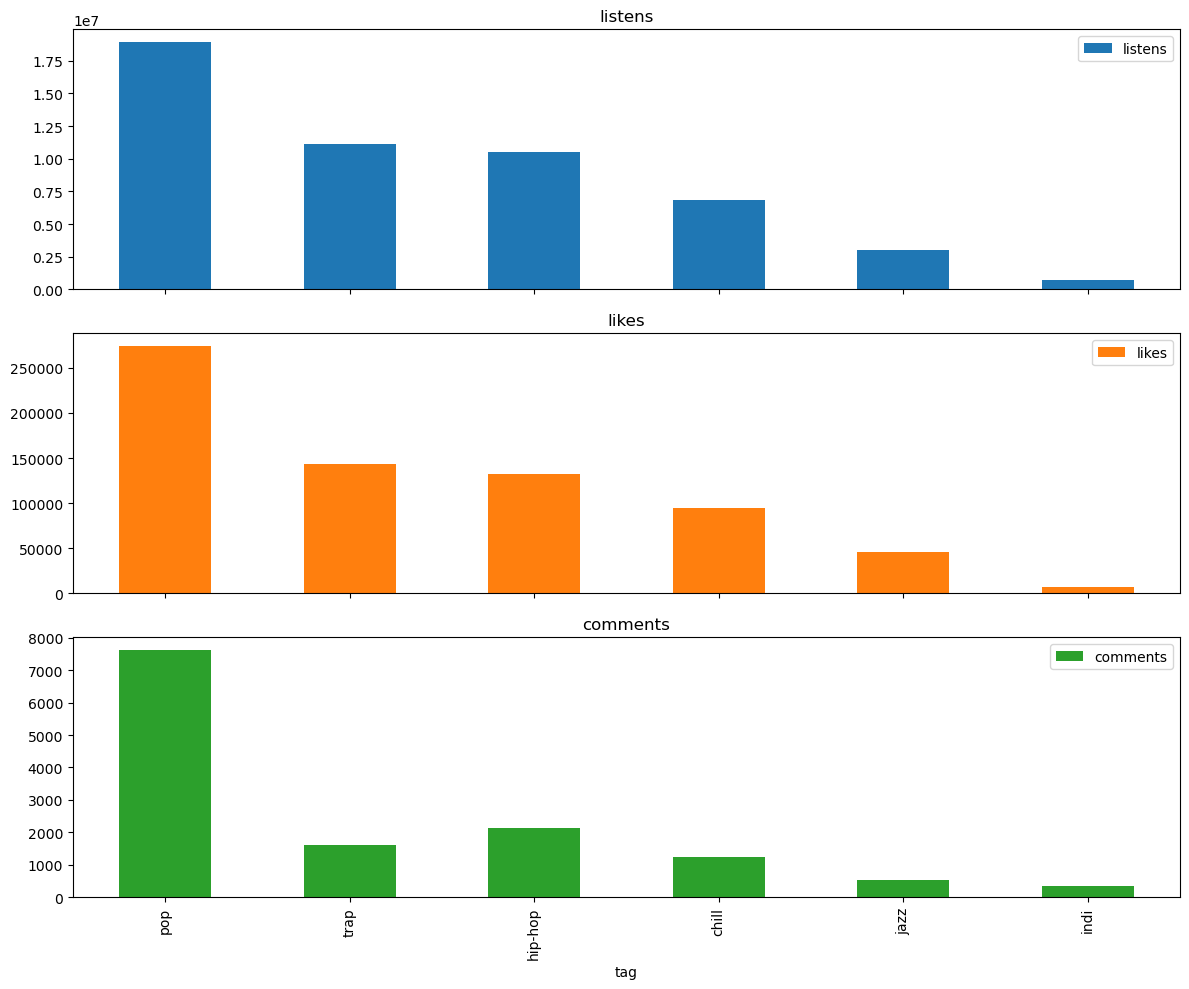

In [79]:
# Группировка по тегам и расчет средних значений
tag_stats = df.groupby('tag').agg({
    'listens': 'mean',
    'likes': 'mean',
    'comments': 'mean'
}).sort_values('listens', ascending=False)

print(tag_stats)

# Визуализация
tag_stats.plot(kind='bar', subplots=True, figsize=(12, 10))
plt.tight_layout()
plt.show()

<b>Инсайты:</b> 
- Поп-треки лидируют по среднему количеству прослушиваний (в 2-3 раза выше, чем у других жанров)
- Hip-hop показывает лучший показатель лайков на прослушивание (выше engagement)
- Jazz имеет относительно низкие показатели, но более стабильную аудиторию

<b>6. Анализ самых популярных треков</b>

In [84]:
# Топ-10 треков по прослушиваниям
top_tracks = df.sort_values('listens', ascending=False).head(10)
print(top_tracks[['tag', 'name', 'listens']])

# Анализ тегов виральных треков
viral_tags = df[df['listens'] > df['listens'].quantile(0.95)]['user_tags']
viral_tag_counts = Counter(" ".join(viral_tags.dropna()).split())
print(viral_tag_counts.most_common(10))

         tag                                               name    listens
76      trap                                         Trap Queen  211829368
11   hip-hop                                         Party Girl   98292664
138      pop                                          Moonlight   85396215
128      pop                                                Sky   55208853
20   hip-hop              Pitbull - Time Of Our Lives Ft. Ne-Yo   52113129
18   hip-hop  PTSD (feat. Chance The Rapper, Juice WRLD & Li...   44618895
59     chill    Imagine Dragons - Thunder (Danny Delgado Remix)   39760891
125      pop                                        Not Allowed   36040629
143      pop                         we fell in love in october   35360733
141      pop                                      We Found Love   32323499
[('Hip-Hop', 2), ('Dance', 2), ('Pop', 2), ('Ne-Yo', 1), ('"Time', 1), ('Of', 1), ('Our', 1), ('Lives"', 1), ('Globalization', 1), ('Dalé', 1)]


<b>Инсайт:</b> Виральные треки (верхние 5% по прослушиваниям) часто содержат теги, связанные с платформами ("tiktok") или известными исполнителями. Это подтверждает гипотезу, что наличие известных имен в тегах повышает популярность трека.

<b>Выводы</b>

1. Популярность жанров: Поп-музыка лидирует по количеству прослушиваний, но хип-хоп показывает более высокий уровень вовлеченности (лайки/прослушивания).
2. Влияние тегов: Наличие дополнительных тегов, особенно связанных с трендами ("tiktok", "remix") или известными исполнителями, значительно увеличивает популярность трека.
3. Поведение пользователей: Сильная корреляция между прослушиваниями и лайками (0.85) против умеренной корреляции с комментариями (0.65) показывает, что пользователи чаще ставят лайки, чем оставляют комментарии.